In [76]:
import deepszsim

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import time
import h5py

from colossus.cosmology import cosmology
from colossus.halo import mass_adv

from astropy.constants import M_sun, G, sigma_T, m_e, c, h, k_B
from astropy import units as u
from decimal import Decimal

In [77]:
d=deepszsim.load_vars() #Make a dictionary and cosmology from the .yaml
d.keys()

dict_keys(['survey', 'survey_freq', 'beam_size_arcmin', 'noise_level', 'image_size_pixels', 'pixel_size_arcmin', 'image_size_arcmin', 'cosmo', 'sigma8', 'ns'])

In [78]:
nsources = 100 #Number of halos to generate
zdist, mdist=deepszsim.dm_halo_dist.flatdist_halo(0.01,1.1,1e14,2e15,nsources) #Generate a flat z, M_200 distribution for sims

In [79]:
sourceid=int(time.time()) #Create an initial ctime for the halo ID list to save catalog
idlist=[sourceid+x for x in range(len(zdist))] #Create the halo ID list for catalog

#Save this array to a h5 file
data = h5py.File('massdist.h5', 'w')
data.create_dataset('Redshift', data=zdist)
data.create_dataset('Mass', data=mdist)
data.create_dataset('id', data=idlist)
data.close()

In [80]:
data = h5py.File('massdist.h5', 'r')
zdist = data['Redshift'][:]
mdist = data['Mass'][:]
idlist = data['id'][:]
data.close()

In [81]:
r=np.linspace(0.01, 10, 1000) #arcmin
r=deepszsim.utils.arcmin_to_Mpc(r,d["pixel_size_arcmin"],d["cosmo"])
#make line for r in Mpc

In [82]:
id1 = "ACT–CL J0206.2−0114"
z1=0.676 #example redshift
M5001=5.7e14 #example M_200 in solar masses

id = "ACT–CL J0104.8+0002"
z =0.277
M500 = 3.5e14

id2 = "ACT-CL J0239.8−0134"
z2 = 0.375
M5002 = 9.1e14

In [83]:
params = {'flat': True, 'H0': d['cosmo'].H0.value, 'Om0': d['cosmo'].Om0,
              'Ob0': d['cosmo'].Ob0, 'sigma8': d['sigma8'], 'ns': d['ns']}
cosmology.addCosmology('myCosmo', **params)
cosmo_colossus = cosmology.setCosmology('myCosmo')
    
M200, R200, c200 = mass_adv.changeMassDefinitionCModel(M500 *d['cosmo'].h, z, '500c', '200c', c_model = 'ishiyama21')
M2001, R2001, c2001 = mass_adv.changeMassDefinitionCModel(M5001 *d['cosmo'].h, z1, '500c', '200c', c_model = 'ishiyama21')
M2002, R2002, c2002 = mass_adv.changeMassDefinitionCModel(M5002 *d['cosmo'].h, z2, '500c', '200c', c_model = 'ishiyama21')
M200 /= d['cosmo'].h  # From M_solar/h to M_solar
R200 = R200 / d['cosmo'].h / 1000  # From kpc/h to Mpc
M2001 /= d['cosmo'].h  # From M_solar/h to M_solar
R2001 = R2001 / d['cosmo'].h / 1000  # From kpc/h to Mpc
M2002 /= d['cosmo'].h  # From M_solar/h to M_solar
R2002 = R2002 / d['cosmo'].h / 1000  # From kpc/h to Mpc
#(M200,R200,_,c200)=deepszsim.make_sz_cluster.get_r200_angsize_and_c200(M200, z, load_vars_dict=d)
#(M2001,R2001,_,c2001)=deepszsim.make_sz_cluster.get_r200_angsize_and_c200(M2001, z1, load_vars_dict=d)
#(M2002,R2002,_,c2002)=deepszsim.make_sz_cluster.get_r200_angsize_and_c200(M2002, z2, load_vars_dict=d)

In [84]:
P200 = deepszsim.make_sz_cluster.P200_Battaglia2012(M200, z, R200_Mpc=R200, load_vars_dict=d) #P200 from Battaglia et al. 2012

In [85]:
P2001 = deepszsim.make_sz_cluster.P200_Battaglia2012(M2001, z1, R200_Mpc=R2001, load_vars_dict=d) #P200 from Battaglia et al. 2012

In [86]:
P2002 = deepszsim.make_sz_cluster.P200_Battaglia2012(M2002, z2, R200_Mpc=R2002, load_vars_dict=d) #P200 from Battaglia et al. 2012

In [87]:
P0 = deepszsim.make_sz_cluster._P0_Battaglia2012(M200,z) #Parameter computation from Table 1 Battaglia et al. 2012
xc = deepszsim.make_sz_cluster._xc_Battaglia2012(M200,z)
beta = deepszsim.make_sz_cluster._beta_Battaglia2012(M200,z)

In [88]:
P01 = deepszsim.make_sz_cluster._P0_Battaglia2012(M2001,z1) #Parameter computation from Table 1 Battaglia et al. 2012
xc1 = deepszsim.make_sz_cluster._xc_Battaglia2012(M2001,z1)
beta1 = deepszsim.make_sz_cluster._beta_Battaglia2012(M2001,z1)

In [89]:
P02 = deepszsim.make_sz_cluster._P0_Battaglia2012(M2002,z2) #Parameter computation from Table 1 Battaglia et al. 2012
xc2 = deepszsim.make_sz_cluster._xc_Battaglia2012(M2002,z2)
beta2 = deepszsim.make_sz_cluster._beta_Battaglia2012(M200,z2)

In [90]:
Pth = deepszsim.make_sz_cluster.Pth_Battaglia2012(r, M200, z, d, R200_Mpc=R200) #Output Battaglia 2012 pressure profile

In [91]:
Pth1 = deepszsim.make_sz_cluster.Pth_Battaglia2012(r, M2001, z1, d, R200_Mpc=R2001) #Output Battaglia 2012 pressure profile

In [92]:
Pth2 = deepszsim.make_sz_cluster.Pth_Battaglia2012(r, M2002, z2, d, R200_Mpc=R2002) #Output Battaglia 2012 pressure profile

In [93]:
Pth_rescaled=(Pth)*(r/R200)**3.

In [94]:
Pth_rescaled1=(Pth1)*(r/R2001)**3.

In [95]:
Pth_rescaled2=(Pth2)*(r/R2002)**3.

In [96]:
y = deepszsim.make_sz_cluster.Pe_to_y(deepszsim.make_sz_cluster.Pth_Battaglia2012, r, 
                                  M200, z, d, R200_Mpc=R200)

only implementing `Battaglia2012` for profile


In [97]:
y1 = deepszsim.make_sz_cluster.Pe_to_y(deepszsim.make_sz_cluster.Pth_Battaglia2012, r, 
                                  M2001, z1, d, R200_Mpc=R2001)

only implementing `Battaglia2012` for profile


In [98]:
y2 = deepszsim.make_sz_cluster.Pe_to_y(deepszsim.make_sz_cluster.Pth_Battaglia2012, r, 
                                  M2002, z2, d, R200_Mpc=R2002)

only implementing `Battaglia2012` for profile


In [99]:
fSZ=deepszsim.simtools.f_sz(150,d["cosmo"].Tcmb0) #get f_SZ for observation frequency of 30 GHz
dT=d["cosmo"].Tcmb0*y[0]*fSZ #get dT from y0 using f_SZ
dT=dT.to(u.uK) #Convert to uK
y_map = deepszsim.make_sz_cluster.generate_y_submap(M200, z, load_vars_dict=d, R200_Mpc=R200)

In [100]:
fSZ1=deepszsim.simtools.f_sz(150,d["cosmo"].Tcmb0) #get f_SZ for observation frequency of 30 GHz
dT1=d["cosmo"].Tcmb0*y1[0]*fSZ1 #get dT from y0 using f_SZ
dT1=dT1.to(u.uK) #Convert to uK
y_map1 = deepszsim.make_sz_cluster.generate_y_submap(M2001, z1, load_vars_dict=d, R200_Mpc=R2001)

In [101]:
fSZ2=deepszsim.simtools.f_sz(150,d["cosmo"].Tcmb0) #get f_SZ for observation frequency of 30 GHz
dT2=d["cosmo"].Tcmb0*y2[0]*fSZ2 #get dT from y0 using f_SZ
dT2=dT2.to(u.uK) #Convert to uK
y_map2= deepszsim.make_sz_cluster.generate_y_submap(M2002, z2, load_vars_dict=d, R200_Mpc=R2002)

In [102]:
dT_map = (y_map * d["cosmo"].Tcmb0 * fSZ).to(u.uK).value
ps = deepszsim.simtools.get_cls(ns=d["ns"], cosmo=d["cosmo"])
conv_map, _ = deepszsim.simtools.add_cmb_map_and_convolve(dT_map, ps, d["pixel_size_arcmin"], d["beam_size_arcmin"])
noise_map=deepszsim.noise.generate_noise_map(d["image_size_pixels"], d["noise_level"], d["pixel_size_arcmin"])
total_map=conv_map + noise_map
width = 10

In [103]:
dT_map1 = (y_map1 * d["cosmo"].Tcmb0 * fSZ1).to(u.uK).value
ps1 = deepszsim.simtools.get_cls(ns=d["ns"], cosmo=d["cosmo"])
conv_map1, _ = deepszsim.simtools.add_cmb_map_and_convolve(dT_map1, ps1, d["pixel_size_arcmin"], d["beam_size_arcmin"])
noise_map1=deepszsim.noise.generate_noise_map(d["image_size_pixels"], d["noise_level"], d["pixel_size_arcmin"])
total_map1=conv_map1 + noise_map1
width = 10

In [104]:
dT_map2 = (y_map2 * d["cosmo"].Tcmb0 * fSZ2).to(u.uK).value
ps2 = deepszsim.simtools.get_cls(ns=d["ns"], cosmo=d["cosmo"])
conv_map2, _ = deepszsim.simtools.add_cmb_map_and_convolve(dT_map2, ps2, d["pixel_size_arcmin"], d["beam_size_arcmin"])
noise_map2=deepszsim.noise.generate_noise_map(d["image_size_pixels"], d["noise_level"], d["pixel_size_arcmin"])
total_map2=conv_map2 + noise_map2
width = 10

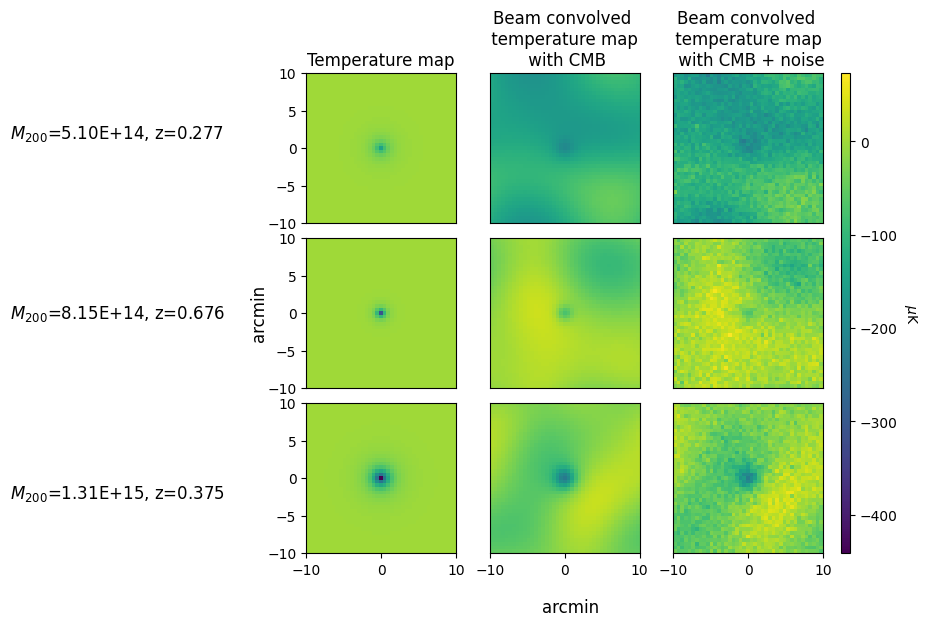

In [105]:
fig = plt.figure(figsize=(8, 6)) 

gs = gridspec.GridSpec(3, 4, width_ratios=[1, 1, 1, 0.05], height_ratios = [1,1,1])

#norm_dT = Normalize(vmin=min(dT_map.min(), dT_map1.min(), dT_map2.min()), vmax=max(dT_map.max(), dT_map1.max(), dT_map2.max()))
#norm_conv_total = Normalize(vmin=min(conv_map.min(), total_map.min(), conv_map1.min(), total_map1.min(), conv_map2.min(), total_map2.min()),
                            #vmax=max(conv_map.max(), total_map.max(), conv_map1.max(), total_map1.max(), conv_map2.max(), total_map2.max()))

vmin = min(dT_map.min(), conv_map.min(), total_map.min(),dT_map1.min(), conv_map1.min(), total_map1.min(), dT_map2.min(), conv_map2.min(), total_map2.min())
vmax = max(dT_map.max(), conv_map.max(), total_map.max(),dT_map1.max(), conv_map1.max(), total_map1.max(), dT_map2.max(), conv_map2.max(), total_map2.max())

class PiecewiseNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, clip=False):
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Define the points where the color changes dramatically
        x = [self.vmin, -50, 0, self.vmax]
        y = [0, 0.3, 0.9, 1]  # Adjust these values to control how the range is emphasized
        return np.ma.masked_array(np.interp(value, x, y))

# Example points to emphasize -50 to 10 dramatically
norm = PiecewiseNormalize(vmin=vmin, vmax=vmax)

ax2 = plt.subplot(gs[0])
im2 = ax2.imshow(dT_map, vmin=vmin, vmax=vmax)
#cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
im2.set_extent([-width, width, -width, width])
ax2.set_xticks([])
#ax2.set_yticks([])
ax2.set_title('Temperature map')
#ax2.set_ylabel('arcmin')
#ax2.set_xlabel('arcmin')

ax3 = plt.subplot(gs[1])
im3 = ax3.imshow(conv_map, vmin=vmin, vmax=vmax)
#cbar3 = plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)
im3.set_extent([-width, width, -width, width])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('Beam convolved \n temperature map \n with CMB')
#ax3.set_ylabel('arcmin')
#ax3.set_xlabel('arcmin')

ax4 = plt.subplot(gs[2])
im4 = ax4.imshow(total_map, vmin=vmin, vmax=vmax)
#cbar4 = plt.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)
im4.set_extent([-width, width, -width, width])
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_title('Beam convolved \n temperature map \n with CMB + noise')
#ax4.set_ylabel('arcmin')
#ax4.set_xlabel('arcmin')

ax2 = plt.subplot(gs[4])
im2 = ax2.imshow(dT_map1, vmin=vmin, vmax=vmax)
#cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
im2.set_extent([-width, width, -width, width])
ax2.set_xticks([])
#ax2.set_yticks([])
#ax2.set_title('dT map')
#ax2.set_ylabel('arcmin')
#ax2.set_xlabel('arcmin')

ax2 = plt.subplot(gs[5])
im2 = ax2.imshow(conv_map1, vmin=vmin, vmax=vmax)
#cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
im2.set_extent([-width, width, -width, width])
ax2.set_xticks([])
ax2.set_yticks([])
#ax2.set_title('Beam convolved temperature \n map with CMB')
#ax2.set_ylabel('arcmin')
#ax2.set_xlabel('arcmin')

ax4 = plt.subplot(gs[6])
im4 = ax4.imshow(total_map1, vmin=vmin, vmax=vmax)
#cbar4 = plt.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)
im4.set_extent([-width, width, -width, width])
ax4.set_xticks([])
ax4.set_yticks([])
#ax4.set_title('Beam convolved temperature \n map with CMB + noise')
#ax4.set_ylabel('arcmin')
#ax4.set_xlabel('arcmin')

ax2 = plt.subplot(gs[8])
im2 = ax2.imshow(dT_map2, vmin=vmin, vmax=vmax)
#cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
im2.set_extent([-width, width, -width, width])
#ax2.set_xticks([])
#ax2.set_yticks([])
#ax2.set_title('dT map')
#ax2.set_ylabel('arcmin')
#ax2.set_xlabel('arcmin')

ax2 = plt.subplot(gs[9])
im2 = ax2.imshow(conv_map2, vmin=vmin, vmax=vmax)
#cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
im2.set_extent([-width, width, -width, width])
#ax2.set_xticks([])
ax2.set_yticks([])
#ax2.set_title('Beam convolved temperature \n map with CMB')
#ax2.set_ylabel('arcmin')
#ax2.set_xlabel('arcmin')

ax4 = plt.subplot(gs[10])
im4 = ax4.imshow(total_map2, vmin=vmin, vmax=vmax)
#cbar4 = plt.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)
im4.set_extent([-width, width, -width, width])
#ax4.set_xticks([])
ax4.set_yticks([])
#ax4.set_title('Beam convolved temperature \n map with CMB + noise')
#ax4.set_ylabel('arcmin')
#ax4.set_xlabel('arcmin')


fig.text(0.35, 0.5, 'arcmin', va='center', rotation='vertical', fontsize=12)
fig.text(0.715, 0.01, 'arcmin', va='center', rotation='horizontal', fontsize=12)

fig.text(0.05, 0.8, '$M_{200}$='+'{:.2E}'.format(Decimal(M200))+', z='+str(z), ha='left', va='center', fontsize=12)
fig.text(0.05, 0.5, '$M_{200}$='+'{:.2E}'.format(Decimal(M2001))+', z='+str(z1), ha='left', va='center', fontsize=12)
fig.text(0.05, 0.2, '$M_{200}$='+'{:.2E}'.format(Decimal(M2002))+', z='+str(z2), ha='left', va='center', fontsize=12)

cbar_ax = plt.subplot(gs[:, 3])
cbar = plt.colorbar(im2, cax=cbar_ax)
cbar.set_label('$\mu$K', rotation=270, labelpad=15)

#plt.suptitle('$M_{200}$='+'{:.2E}'.format(Decimal(M200))+', z='+str(z), y=1)

#plt.tight_layout(pad = 0.5)
plt.subplots_adjust(left=0.4, right=1.1, top=0.9, bottom=0.1, wspace=0.01, hspace=0.1)

plt.savefig("/Users/elaineran/Desktop/DeepSZSimfig", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [106]:
R200

1.5213303905297706

In [107]:
deepszsim.make_sz_cluster.get_r200_angsize_and_c200(M200, z, d)

(509760718557924.06, 1.5213303723382519, 5.958978321500461, 3.6565907367592523)

In [108]:
#B12 mass from the https://arxiv.org/pdf/1301.0816

In [109]:
#go from M500 to M200!